<a href="https://colab.research.google.com/github/ArmandoSep/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=30.72655339990704, pvalue=2.127226356294926e-07)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



### Larger the sample size = less variance to our estimates

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.5, 0.5833333333333334, 0.5, 0.6666666666666666, 0.25, 0.8333333333333334, 0.5, 0.6666666666666666, 0.5, 0.5833333333333334, 0.4166666666666667, 0.25, 0.25, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.5833333333333334, 0.5, 0.5, 0.4166666666666667, 0.75, 0.6666666666666666, 0.5, 0.25, 0.5833333333333334, 0.5, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.75, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.75, 0.6666666666666666, 0.5, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667, 0.3333333333333333, 0.4166666666666667, 0.4166666666666667, 0.5, 0.6666666666666666, 0.5, 0.5833333333333334, 0.3333333333333333, 0.5833333333333334, 0.25, 0.5833333333333334, 0.3333333333333333, 0.5, 0.5833333333333334, 0.5833333333333334, 0.5, 0.5, 0.25, 0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.3333333333333333, 0.33333333

In [112]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,0
1,1
2,1
3,0
4,1


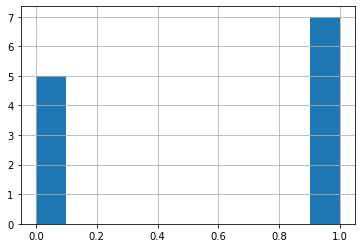

In [113]:
df.single_sample.hist();

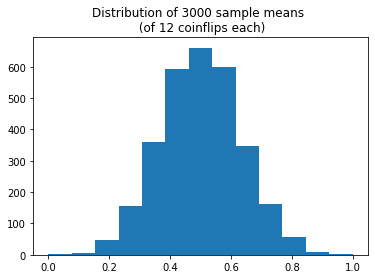

In [115]:
ax = plt.hist(sample_means, bins=13)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

In [118]:
sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=50)
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.54, 0.42, 0.52, 0.48, 0.52, 0.52, 0.54, 0.46, 0.4, 0.44, 0.54, 0.4, 0.52, 0.64, 0.38, 0.48, 0.58, 0.46, 0.56, 0.64, 0.66, 0.52, 0.46, 0.48, 0.42, 0.54, 0.54, 0.5, 0.58, 0.44, 0.52, 0.46, 0.46, 0.5, 0.52, 0.64, 0.46, 0.48, 0.48, 0.44, 0.58, 0.4, 0.48, 0.62, 0.36, 0.44, 0.56, 0.46, 0.42, 0.62, 0.52, 0.48, 0.5, 0.62, 0.48, 0.38, 0.64, 0.46, 0.5, 0.6, 0.5, 0.44, 0.46, 0.44, 0.48, 0.58, 0.56, 0.46, 0.5, 0.52, 0.56, 0.5, 0.5, 0.56, 0.46, 0.5, 0.42, 0.5, 0.42, 0.52, 0.6, 0.62, 0.5, 0.46, 0.46, 0.54, 0.56, 0.5, 0.52, 0.36, 0.44, 0.62, 0.46, 0.46, 0.46, 0.6, 0.44, 0.54, 0.44, 0.46, 0.46, 0.52, 0.66, 0.62, 0.54, 0.42, 0.46, 0.52, 0.46, 0.38, 0.52, 0.5, 0.62, 0.62, 0.54, 0.44, 0.54, 0.44, 0.58, 0.62, 0.42, 0.42, 0.38, 0.56, 0.48, 0.48, 0.46, 0.5, 0.58, 0.48, 0.54, 0.54, 0.54, 0.5, 0.42, 0.5, 0.54, 0.54, 0.38, 0.54, 0.5, 0.62, 0.5, 0.48, 0.58, 0.34, 0.42, 0.6, 0.5, 0.5, 0.44, 0.58, 0.54, 0.58, 0.52, 0.54, 0.54, 0.42, 0.44, 0.38, 0.46, 0.46, 0.48, 0.52, 0.58, 0.4, 0.4, 0.44, 0.52, 0.6, 0.44

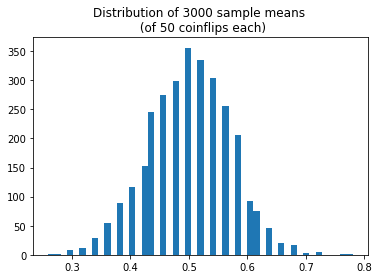

In [119]:
ax = plt.hist(sample_means, bins=49)
plt.title('Distribution of 3000 sample means \n (of 50 coinflips each)');

What does the Central Limit Theorem State? **That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.**

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [116]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=12)
  coinflips_large = np.random.binomial(n=1, p=.5, size=50)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.5, 0.6666666666666666, 0.25, 0.8333333333333334, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.3333333333333333, 0.25, 0.6666666666666666, 0.5833333333333334, 0.8333333333333334, 0.5, 0.5833333333333334, 0.16666666666666666, 0.25, 0.4166666666666667, 0.6666666666666666, 0.16666666666666666, 0.4166666666666667, 0.6666666666666666, 0.25, 0.4166666666666667, 0.5, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.8333333333333334, 0.5, 0.5, 0.5, 0.5, 0.4166666666666667, 0.4166666666666667, 0.5, 0.16666666666666666, 0.5, 0.75, 0.5833333333333334, 0.6666666666666666, 0.6666666666666666, 0.5, 0.6666666666666666, 0.6666666666666666, 0.4166666666666667, 0.5, 0.25, 0.6666666666666666, 0.8333333333333334, 0.25, 0.5, 0.6666666666666666, 0.5, 0.5, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.3333333333333333, 0.25, 0.4166666666666667, 0.3333333333333333, 0.583333

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


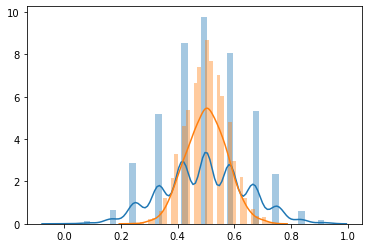

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

## Standard Error of the Mean

SE = Is the standard deviation of this imaginary distribution of sample means (like the ones we are creating above)

What does it mean to "estimate" the Population mean?

## Build and Interpret a 95% Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [124]:
coinflips = np.random.binomial(n=1, p=.5, size=50)
coinflips

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0])

In [125]:
coinflips.mean()

0.52

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # look for t statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom (49)
  t = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

### 95% confidence interval:

In [128]:
mean, lower, upper = confidence_interval(coinflips)

print(mean)
print(lower)
print(upper)

0.52
0.5097634698259489
0.5302365301740511


In [130]:
# the larger the sample, the smaller the margin of error

# margin of error
0.5302365301740511 - 0.52

0.010236530174051128

## Communicating the precision of our sample estimates

## 1)

Provide just the mean and the margin of error.

The probability that this coin lands heads-up is .52 plus minus .0102

Mean: .52, MOE: (+/-) .01


## 2)
Graphically

## Graphically Represent a Confidence Interval

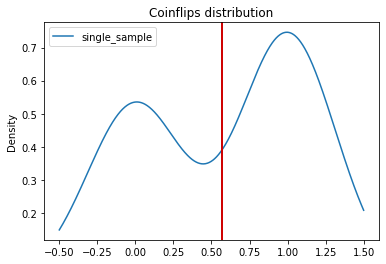

In [135]:
coinflips = np.random.binomial(n=1, p=.5, size=200)

CI = confidence_interval(coinflips)

df.plot.density()
plt.title('Coinflips distribution')
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

## Matplotlib Error Bars

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html

Matplotlib doesn't want the upper and lower bounds to plot ther error bars.

It wants just the mean 

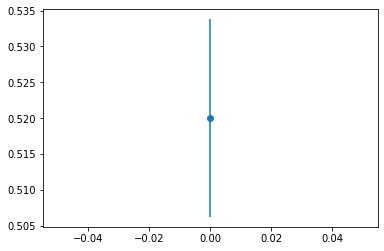

In [137]:
# x position, margin of error, format
plt.errorbar(0, mean, yerr=0.0138, fmt='o')
plt.show()

# Chi^2 Tests

# $\chi^2$ Tests

Single variable version of Chi^2

(Person's X^2 test)

Null hypothesis: The distribution of observed frequencies is equal to the distribution of expected frequencies (the die is fair)

Alternative hypothesis: the distribution of obeerved frequencies is not equal to the distribution of expected frequencies - they are diffeent. 
(The die is unfair)

Confidence level: 95%




In [0]:
import numpy as np

# Oberseved frequencies
oberseved_frequencies = np.array([27,13,10,15,30,32])
# Expected frequency
expected_frequency = np.array([27,13,10,15,30,32]).sum()/6
expected_frequency = np.array([27,13,10,15,30,32]).mean()

# Expected frequencies
expected_frequencies = np.array([expected_frequency,expected_frequency,
                                 expected_frequency,expected_frequency,
                                 expected_frequency,expected_frequency])

expected_frequencies



array([21.16666667, 21.16666667, 21.16666667, 21.16666667, 21.16666667,
       21.16666667])

In [0]:
from scipy import stats

stats.chisquare(oberseved_frequencies, expected_frequencies)

Power_divergenceResult(statistic=21.67716535433071, pvalue=0.0006029877129094496)

Based on a chisqueare statistic of 21.677, and a P-Value of 0.0006, I reject the null hypothesis that the expected frequencies are not as the observed frequencies, and conclude that this is not a fair die at the 95%. 


## Expected frquency is:

Total number of observations / # categories

## Calculate the chi^2 statistic (test statistic)

\begin{align}
\chi^2 = \sum \frac{(oberseved_i-expected_i)^2}{{expected_i}}
\end{align}



In [0]:
# Cell 1
# Chi square value for cell 1
(27 - 21.66666)**2 / 21.6666

1.3128278343441058

In [0]:
list1 = [1,2,3]
list2 = [4,5,6]

list1+list2

[1, 2, 3, 4, 5, 6]

In [0]:
np1 = np.array(list1)
np2 = np.array(list2)

np1 + np2

array([5, 7, 9])

In [0]:
((oberseved_frequencies - expected_frequencies)**2 / expected_frequencies).sum()

21.67716535433071

## Chi^2 statistic to P-Value

## By using chi square distribution

[Chi Square Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)

df= sides of dice - 1



## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [0]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.7333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.5, 0.5, 0.5333333333333333, 0.5, 0.4, 0.43333333333333335, 0.3333333333333333, 0.5333333333333333, 0.5333333333333333, 0.4666666666666667, 0.5, 0.6, 0.6333333333333333, 0.5, 0.3333333333333333, 0.43333333333333335, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.7, 0.7, 0.5333333333333333, 0.5, 0.6666666666666666, 0.43333333333333335, 0.43333333333333335, 0.4, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.36666666666666664, 0.4666666666666667, 0.4, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.7333333333333333, 0.4, 0.4666666666666667, 0.6, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5333333333333333, 0.43333333333333335, 0.5, 0.36666666666666664, 0.4, 0.5666666666666667, 0.5, 0.36666666666666664, 0.5666666666666667, 0.7, 0.43333333333333335, 0.36666666666666664, 0.56666666

In [0]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.48189276007256693, 0.5181072399274331)


In [0]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.48189276007256693, 0.5181072399274331)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.0958141381351718, pvalue=0.2758187277462794)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.9842235343454973, pvalue=0.04999925456754134)

## Run a $\chi^{2}$ Test for  **independence** (between categorial variables)using Scipy

In [74]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
# Read categorical variables
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Is there a relationship between the number of years of schooling that a person obtains and their sex/gender

Is there a relationship between these two variables

If there is a relationship, I will say that the variables are **dependent**, if there is no relationship, I'll say that the variables are independent.

In [76]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [77]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

## To test this I need an array of observed frequencies.


Chi^2 crosstab is called "contingency table"

In [78]:
# Margins -> Value counts

observed_frequencies1 = pd.crosstab(df['sex'], df['education-num'], margins=True)

observed_frequencies1

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sex,,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86,10771
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327,21790
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [0]:
observed = pd.crosstab(df['sex'], df['education-num'])

observed = observed.values

## Expected value calculation

(row1Total * column1Total) / TotalObservations



In [80]:
# 1 year of education female

(10771*51)/32561

16.87051994717607

In [102]:
# Use .values to change it to a nunpy array
row_sums = observed_frequencies1.iloc[0:2, 16:].values
row_sums = row_sums.T[0]

row_sums

array([10771, 21790])

In [100]:
col_sums = observed_frequencies1.iloc[2:, 0:16].values
col_sums = col_sums[0]

col_sums

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [83]:
# Sample size
total_total = df.shape[0]

total_total

32561

In [104]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 16)
[[  16.87051995   55.57347747  110.15457142  213.69325266  170.02837751
   308.63127668  388.6835478   143.2340223  3473.67313657 2411.82276343
   457.15801112  352.95774086 1771.40459445  569.95893861  190.53763705
   136.61813212]
 [  34.12948005  112.42652253  222.84542858  432.30674734  343.97162249
   624.36872332  786.3164522   289.7659777  7027.32686343 4879.17723657
   924.84198888  714.04225914 3583.59540555 1153.04106139  385.46236295
   276.38186788]]


In [107]:
### chi^2 statistic

chi2 = ((observed-expected)**2 / expected).sum()
chi2

297.7150037250368

### Null hypothesis: the two variables are independent

###Alternative: the two variables are dependent (there is a relationship between them)

###Condidence level: 95%

In [109]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

297.7150037250368
1.6677784409205546e-54
15
[[  16.87051995   55.57347747  110.15457142  213.69325266  170.02837751
   308.63127668  388.6835478   143.2340223  3473.67313657 2411.82276343
   457.15801112  352.95774086 1771.40459445  569.95893861  190.53763705
   136.61813212]
 [  34.12948005  112.42652253  222.84542858  432.30674734  343.97162249
   624.36872332  786.3164522   289.7659777  7027.32686343 4879.17723657
   924.84198888  714.04225914 3583.59540555 1153.04106139  385.46236295
   276.38186788]]


### Conclusion: 
Based on a chi^2 value of 297.7 and a p-value of -0, we reject the null hypothesisthat the number of years of education obtained by census responders and the sex/gender of those responders is independent, and suggest the alternative that these two variables are dependet.

## Degrees of freedom:

Rows of contingency table - 1 * columns of contingency table - 1

In [110]:
pd.crosstab(df['sex'], df['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sex,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327
